In [20]:
import requests
import pandas as pd

In [21]:
url = 'https://mlchartist-server.herokuapp.com/api/backtest?companies=2'
response = requests.get(url).json()

In [22]:
response

{'NDX': [0.9899131150611994,
  0.9830780363768178,
  1.0100745549875059,
  0.995925390080821,
  0.9848086288820671,
  0.9990462415485644,
  0.9969072560320834,
  0.9915475696514883,
  1.003954628467228,
  0.9837910950396114,
  0.9789645284204738,
  1.0270463541233759,
  1.007555726096208,
  1.0076209336786275,
  1.019428444198886,
  1.0114111757798334,
  1.0015889244501082,
  0.9944688808001224,
  1.005137648565567,
  0.9957966522338856,
  1.006338989532177,
  1.0144661809176085,
  1.0042355344841134,
  1.0091708899884453,
  0.998800733000261,
  0.9992547336060802,
  0.9829755717323015,
  1.0046775753009272,
  1.003933368733652,
  1.0018316453464453,
  1.0126533764824357,
  1.004078196324989,
  1.0074194019861997,
  0.9979141452513398,
  0.9929208167013123,
  1.0052749945734472,
  1.0097791451488847,
  0.9991623858086394,
  1.0058834107066426,
  1.0029824102003717,
  0.9949980732854437,
  0.9951659375204994,
  1.0019483416912163,
  0.991241287782463,
  1.0089624628265836,
  1.006254174

In [23]:
response_df = pd.DataFrame(response)
response_df.head()

,NDX,avg_return,date
0,0.989913,0.984193,1558051200000000000
1,0.983078,0.962962,1558310400000000000
2,1.010075,1.007754,1558396800000000000
3,0.995925,0.991946,1558483200000000000
4,0.984809,0.977194,1558569600000000000


In [29]:
response_df['date'] = pd.to_datetime(response_df['date'])
response_df.set_index('date', inplace=True)

<AxesSubplot:xlabel='date'>

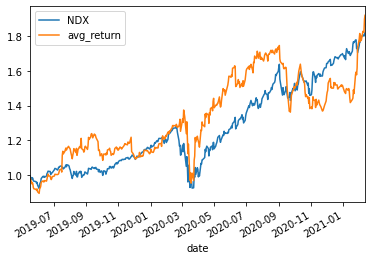

In [30]:
response_df = response_df.fillna(value=1)
response_df.cumprod().plot()